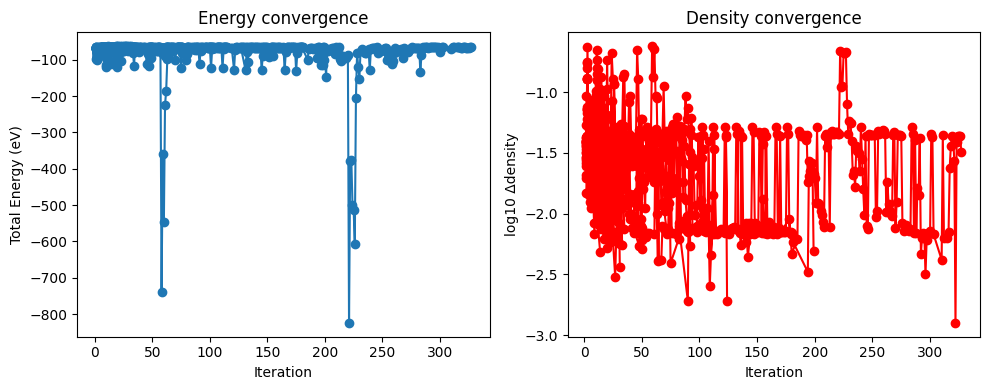

In [49]:
import re
import matplotlib.pyplot as plt

def parse_scf_log(logfile):
    """
    Parse GPAW SCF iteration log for energies and density errors.
    Works with lines like:
    iter:   5 14:13:09   -65.254616        c -1.22
    """
    iterations, energies, dens_errors = [], [], []

    with open(logfile, "r") as f:
        for line in f:
            if line.strip().startswith("iter:"):
                parts = line.split()
                try:
                    it = int(parts[1])
                    energy = float(parts[3])
                    dens_err = None
                    for p in parts:
                        try:
                            if re.match(r"^-?\d+\.\d+$", p):  # pick floats
                                pass
                        except:
                            continue
                    # density error is usually the last float in line
                    try:
                        dens_err = float(parts[-1])
                    except:
                        pass

                    iterations.append(it)
                    energies.append(energy)
                    dens_errors.append(dens_err)
                except:
                    continue

    return iterations, energies, dens_errors


def plot_convergence(logfile):
    it, E, dens = parse_scf_log(logfile)

    plt.figure(figsize=(10,4))

    # Energy plot
    plt.subplot(1,2,1)
    plt.plot(it, E, marker="o")
    plt.xlabel("Iteration")
    plt.ylabel("Total Energy (eV)")
    plt.title("Energy convergence")

    # Density error plot
    plt.subplot(1,2,2)
    plt.plot(it, dens, marker="o", color="red")
    plt.xlabel("Iteration")
    plt.ylabel("log10 Δdensity")
    plt.title("Density convergence")

    plt.tight_layout()
    plt.savefig("scf_convergence.png", dpi=300)
    plt.show()


# === Run on your log ===
plot_convergence("caf2_cluster_lcao.log")   # or replace with your filename